# <u>HELP Project</u> #
The purpose of this project is to use Unsupervised Learning as a means to assist HELP International determine the greatest areas of resource need given socio-economic, health, and overall country development.  HELP International delivers humanitarian aid and machine learning is going to be used to help make recommendations on where they should be dedicating their resources. 

## <u>Overview</u> ##
The following steps will be done for this project:

###  <u>EDA</u> ###
The data will be explored to understand what extent the data will need to be cleaned and how to proceed with organizing the data in a way that makes it more digestible for training the models.

###  <u>Model Training</u> ###
Three different unsupervised models will be used for this project: DBSCAN clustering, K-Means clustering, and Hierarchial clustering.  

### <u>Model Comparisons</u> ###
All three models will be compared.

### <u>Conclusions and Recomendations</u> ###
The results of each model will lead to several recomendations that can be made to HELP.

# <u>EDA</u> #



In [47]:
# Load in any necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [48]:
# Import datasets
country_data = pd.read_csv('Country-data.csv')
data_dictionary = pd.read_csv('data-dictionary.csv')

In [49]:
#print(country_data.head())
print(country_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [50]:
print(data_dictionary)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


In [92]:
pd.set_option('display.max_colwidth', None)  # Set the maximum column width to display full content
print(data_dictionary)

  Column Name  \
0     country   
1  child_mort   
2     exports   
3      health   
4     imports   
5      Income   
6   Inflation   
7  life_expec   
8   total_fer   
9        gdpp   

                                                                                                        Description  
0                                                                                               Name of the country  
1                                                       Death of children under 5 years of age per 1000 live births  
2                                     Exports of goods and services per capita. Given as %age of the GDP per capita  
3                                                 Total health spending per capita. Given as %age of GDP per capita  
4                                     Imports of goods and services per capita. Given as %age of the GDP per capita  
5                                                                                             Net income

Now that there is more of an understanding of what is in the dataset, some adjusting of the data needs to happen in order to make it easier to work with.  

In [51]:
# change datatypes to float in order to make data easier to work with
country_data['income'] = country_data['income'].astype('float64')
country_data['gdpp'] = country_data['gdpp'].astype('float64')

# check for missing data
print(country_data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


Since there is no missing data, further analysis can be done to see if there are any outliers that may skew the data.  

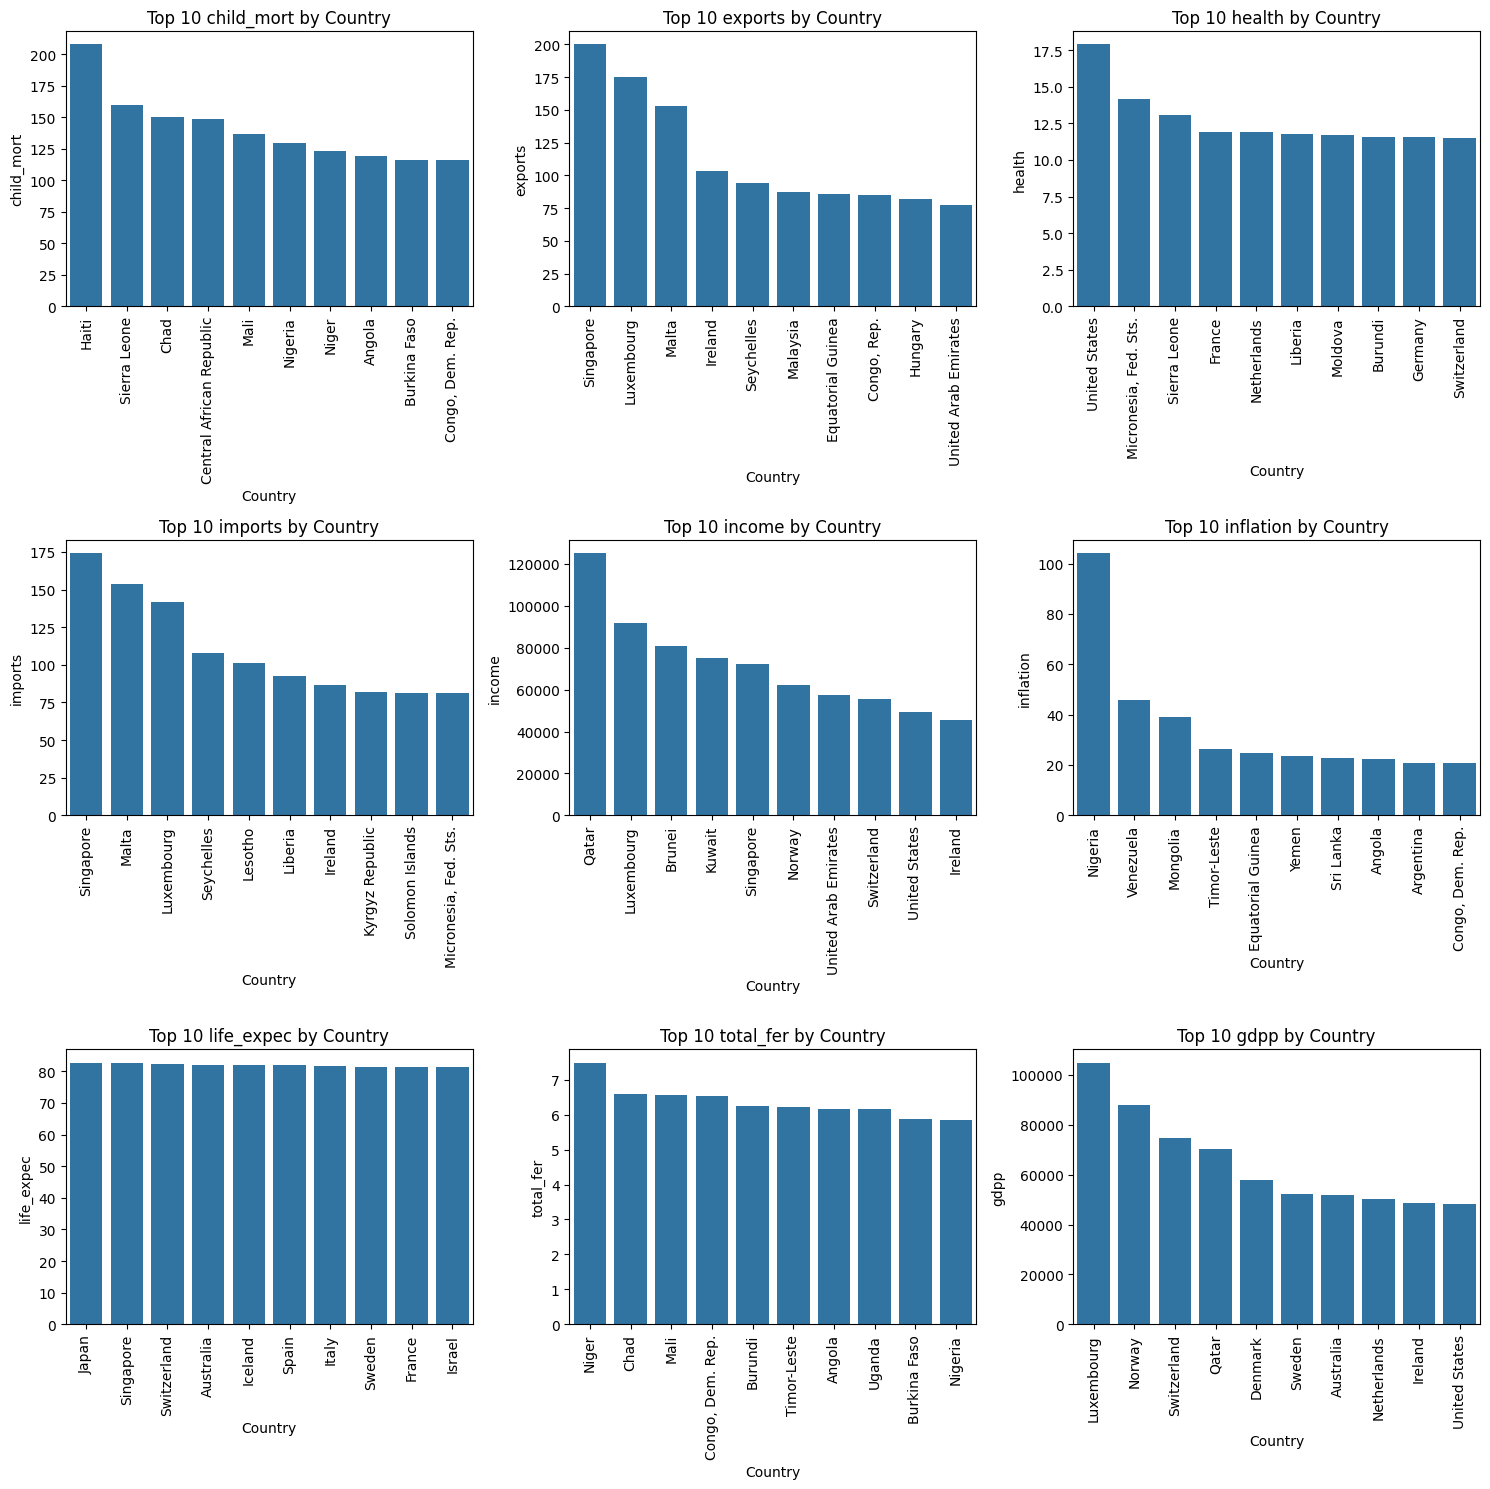

In [52]:
# Assuming 'country_data' is your DataFrame with the specified structure
# Replace this with your actual DataFrame
# country_data = pd.read_csv('your_file.csv')

# Get only the columns except 'country'
columns_to_plot = country_data.columns[1:]  # Exclude the 'country' column

# Create an empty dictionary to store top 10 values for each column
top_10_dict = {}

# Calculate top 10 values for each column (excluding 'country')
for column in columns_to_plot:
    top_10_dict[column] = country_data.nlargest(10, column)[['country', column]]

# Calculate the number of rows and columns needed for the grid
num_cols = 3  # Number of columns in the grid
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Number of rows in the grid

# Create a figure and axis objects using matplotlib
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Loop through each column and create a bar plot
for i, column in enumerate(columns_to_plot):
    ax = axes[i // num_cols, i % num_cols]
    sns.barplot(x='country', y=column, data=top_10_dict[column], ax=ax)
    ax.set_title(f'Top 10 {column} by Country')
    ax.set_ylabel(column)
    ax.set_xlabel('Country')
    ax.tick_params(axis='x', labelrotation=90)


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

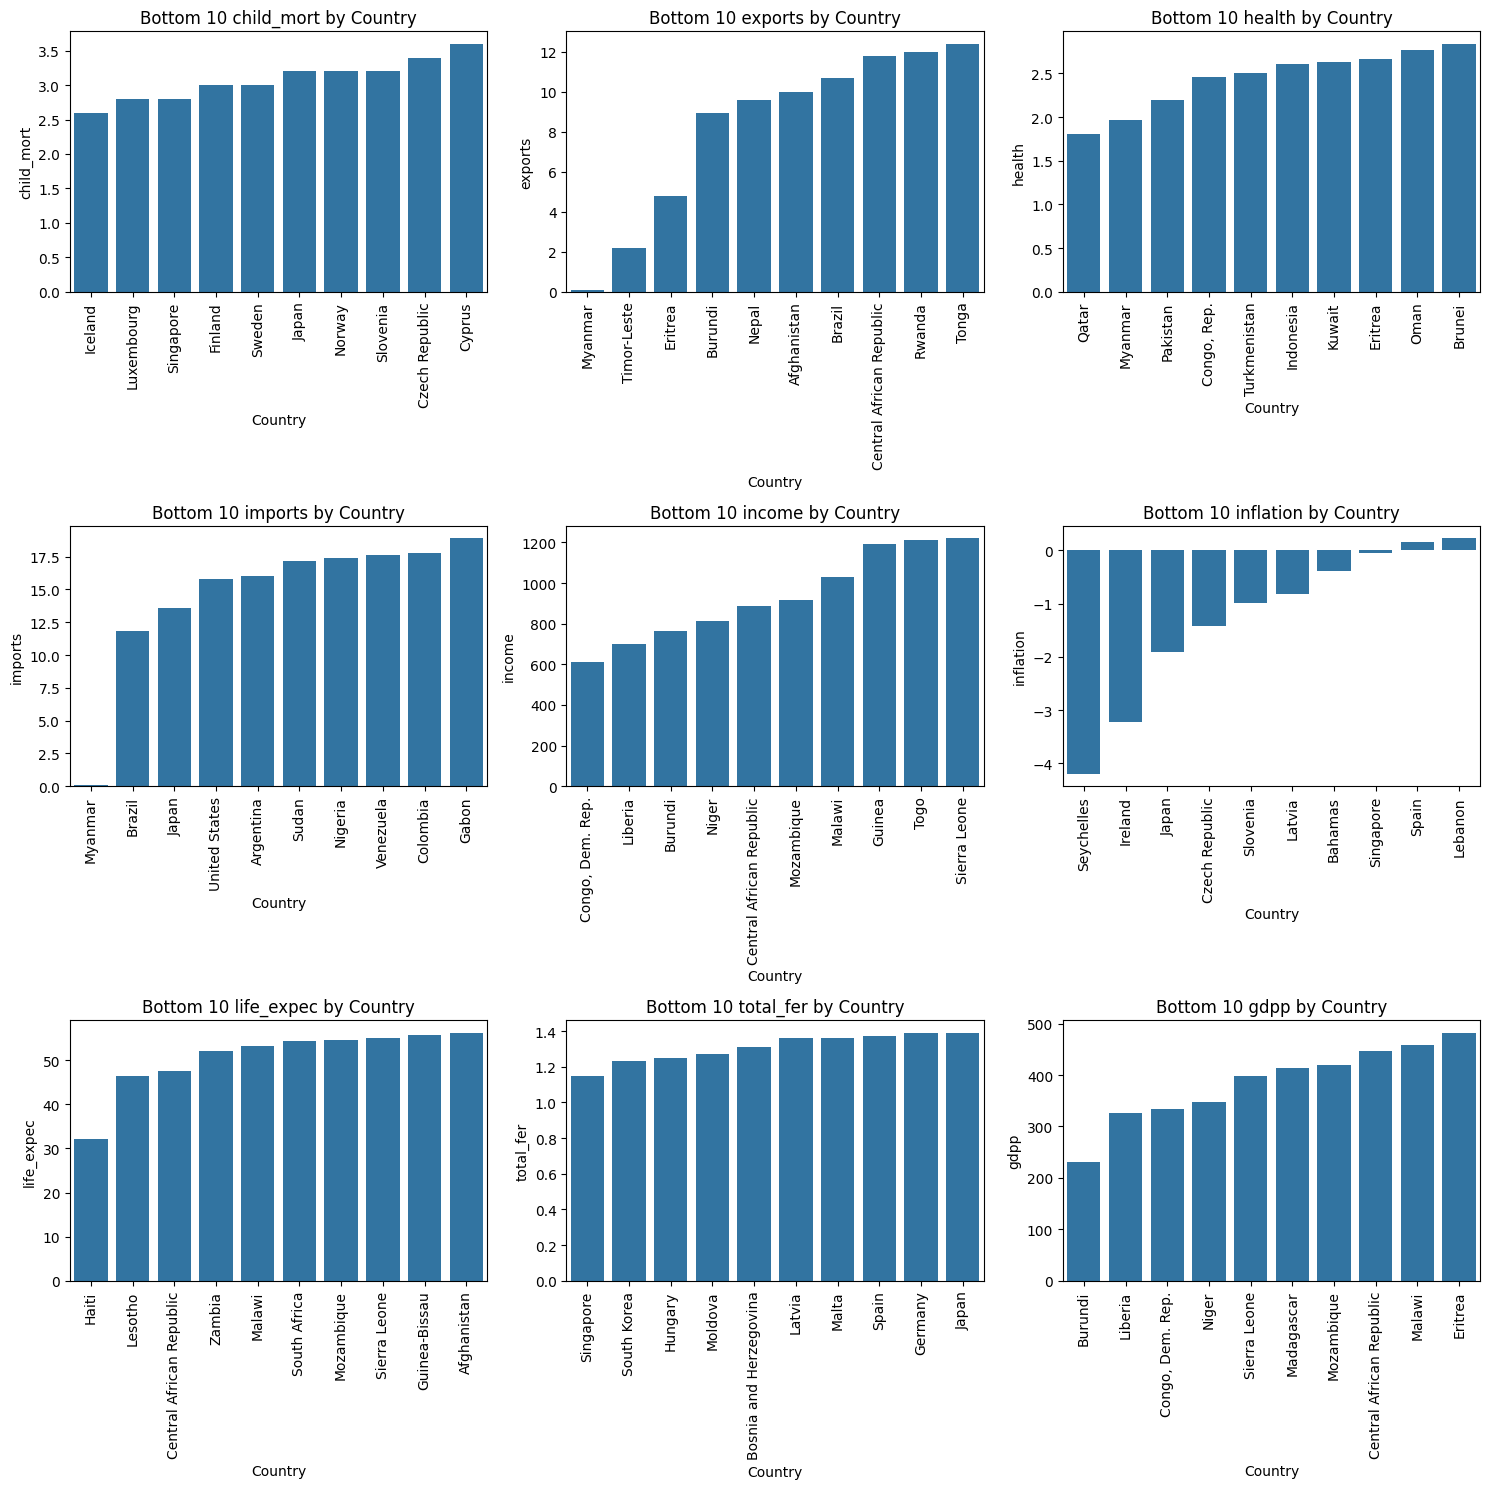

In [53]:
# Get only the columns except 'country'
columns_to_plot = country_data.columns[1:]  # Exclude the 'country' column

# Create an empty dictionary to store bottom 10 values for each column
bottom_10_dict = {}

# Calculate bottom 10 values for each column (excluding 'country')
for column in columns_to_plot:
    bottom_10_dict[column] = country_data.nsmallest(10, column)[['country', column]]

# Calculate the number of rows and columns needed for the grid
num_cols = 3  # Number of columns in the grid
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Number of rows in the grid

# Create a figure and axis objects using matplotlib
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Loop through each column and create a bar plot
for i, column in enumerate(columns_to_plot):
    ax = axes[i // num_cols, i % num_cols]
    sns.barplot(x='country', y=column, data=bottom_10_dict[column], ax=ax)
    ax.set_title(f'Bottom 10 {column} by Country')
    ax.set_ylabel(column)
    ax.set_xlabel('Country')
    ax.tick_params(axis='x', labelrotation=90)
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

The overall goal for HELP is to find countries that desperately need resources.  So there are not really any "outliers" in this project because we are looking for who needs the most help.  So in a way, the outliers are the things we are looking for.


Let's take a look to see what a correlation matrix would look like for this dataset:


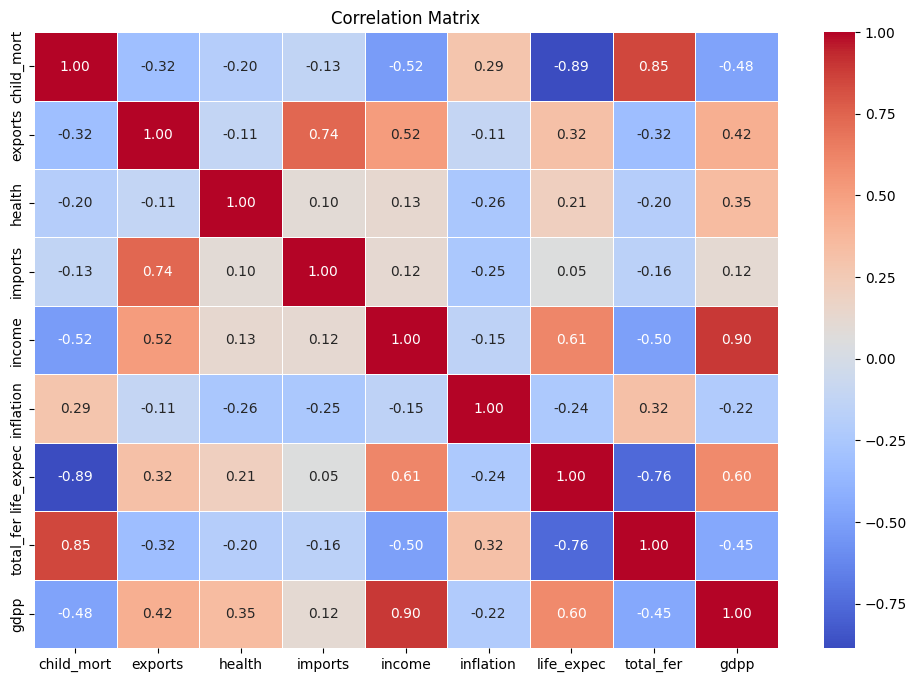

In [54]:
# only take a look at the columns that aren't Country
numeric_data = country_data.drop(columns = 'country')

# create correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize = (12, 8))

# heatmap with annotations
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

Taking a look at the graphs as well as the correlation matrix, there's some pretty obvious things that stand out.  

Generally speaking, wealthier countries spend more money on health and have a strong GDP.  These wealthier countries also have more exports as well indicating a strong job market in that country.  

When it comes to health, unsurprisingly the total fertility rate has a direct and positive relationship with child morality.  

Generally speaking, the more a country can produce economically the better off their overall health is.  

The main mission of HELP is to target poverty and help people in backward countries get basic amenities + relief during hours of greatest need.  In order to zero in on which countries need the most help, it's important to standardize the data that we working with.  This type of feature engineering will greatly help out with clumping the data together.  The reason this needs to happen is because while there are lots of different factors at play when measuring poverty, most of our data can be categorized together.  Additionally, there's different scales for each factor as well so standardization is very necessary.  

Here are the new categories that each column will be put into as well as the rational for why each is grouped:

<u>health</u>: total_fer, life_expec, child_mort

These were grouped together because they fit categorically and have strong correlations (both positive and negative) between the 3 categories

<u>commerce</u>: imports, exports

These were grouped together because they fit categorically together and have strong correlations

<u>economics</u>: income, inflation, gdpp, health

Similarly to the other groups, these categoricaly fit together.  There's also some fairly decent correlations (both positive and negative) between the 4 sub-categories.  The decision to put 'health' into the economics category may not make a lot of sense intuitively, but because 'health' really didn't have a strong correlation with anything else it was difficult to find a place to put it.  The strongest correlation actually came with 'gdpp' since 'health' is actually a total percentage spend of the GDP per capita.  That creates further rationalization that 'health' should be grouped into the 'economics' category since it's focusing on how each country spends money on health-versus actually looking at specific health characteristics like ferility, life expectancy, and child mortality.  


By grouping these together, there can be a more robust look at poverty.


## <u>Feature Engineering</u> ##

In [55]:
# Calculate mean values of specific columns in 'numeric_data'
child_mort_mean = numeric_data['child_mort'].mean()
health_mean = numeric_data['health'].mean()
life_expec_mean = numeric_data['life_expec'].mean()
total_fer_mean = numeric_data['total_fer'].mean()
imports_mean = numeric_data['imports'].mean()
exports_mean = numeric_data['exports'].mean()
income_mean = numeric_data['income'].mean()
inflation_mean = numeric_data['inflation'].mean()
gdpp_mean = numeric_data['gdpp'].mean()

# Create a dataframe of the ratios
ratio_df = pd.DataFrame({
    'Health': (numeric_data['child_mort'] / child_mort_mean)  +
              (numeric_data['life_expec'] / life_expec_mean) +
              (numeric_data['total_fer'] / total_fer_mean),
    'Commerce': (numeric_data['imports'] / imports_mean) +
                (numeric_data['exports'] / exports_mean),
    'Economics': (numeric_data['income'] / income_mean) +
                 (numeric_data['inflation'] / inflation_mean) +
                 (numeric_data['gdpp'] / gdpp_mean) +
                 (numeric_data['health'] / health_mean)
})

# Displaying the first few rows of ratio_df
print(ratio_df.head())

print(ratio_df.info())

     Health  Commerce  Economics
0  5.127712  1.200812   2.461785
1  2.074883  1.717580   2.432676
2  2.777939  1.603752   3.777190
3  6.050867  2.430387   3.913071
4  2.080174  2.362940   3.124874
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Health     167 non-null    float64
 1   Commerce   167 non-null    float64
 2   Economics  167 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB
None


At this point, there are two different methods for going forward with this new dataset.  The new data can either be standardized, or normalized.  However, it's important to check if the data is Guassian or not.  If it is Guassian, it's best to standardize the data instead of normalizing it.  

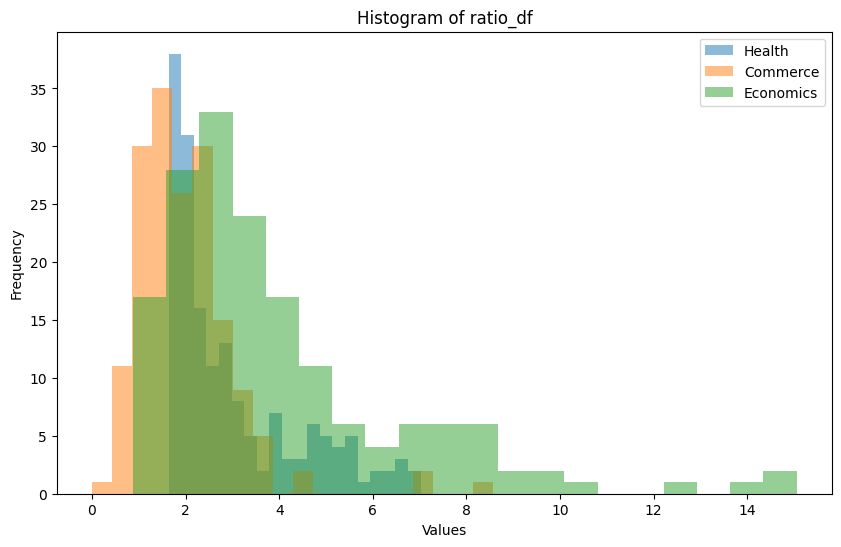

In [56]:
# plot a histogram
plt.figure(figsize=(10,6))
for column in ratio_df.columns:
    plt.hist(ratio_df[column], bins = 20, alpha = 0.5, label = column)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of ratio_df')
plt.legend()
plt.show()

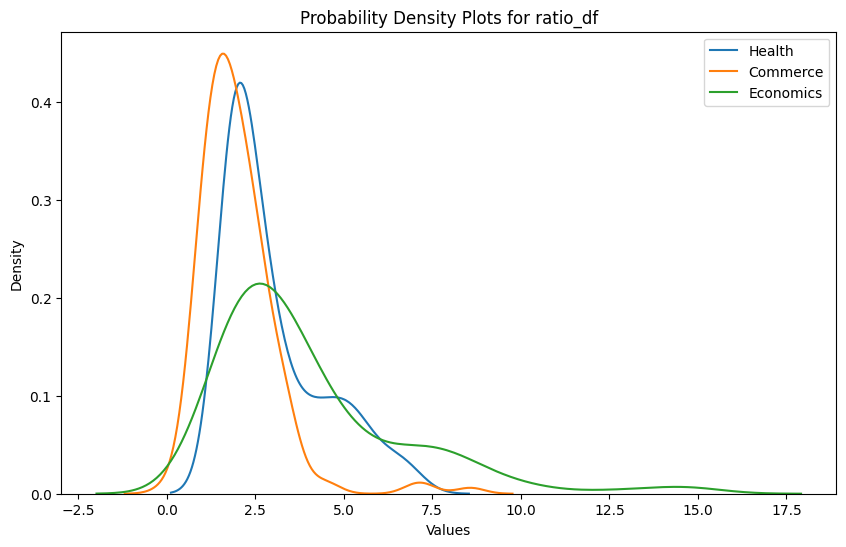

In [57]:
# probability density plot
plt.figure(figsize=(10,6))
for column in ratio_df.columns:
    sns.kdeplot(ratio_df[column], label = column)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Probability Density Plots for ratio_df')
plt.legend()
plt.show()

In [58]:
# try out a shapiro wilks test to measure normalcy
from scipy.stats import shapiro
for column in ratio_df.columns:
    stat, p = shapiro(ratio_df[column])
    print(f'{column}: pvalue = {p}')
    if p > 0.05:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')

Health: pvalue = 1.2295769871023543e-12
Data does not look Gaussian (reject H0)
Commerce: pvalue = 9.348159860133112e-14
Data does not look Gaussian (reject H0)
Economics: pvalue = 9.539632538774212e-13
Data does not look Gaussian (reject H0)


Given the graphs that have been created and the shapiro wilks test, it's safe to say the data is not Gaussian.  So it is probably best if there is min-max scaling performed on the data instead of standardization.  This is because normalization works best with non-Gaussian data distribution.  

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_ratio_df = scaler.fit_transform(ratio_df)
normalized_ratio_df = pd.DataFrame(normalized_ratio_df, columns = ratio_df.columns)
print(normalized_ratio_df)

       Health  Commerce  Economics
0    0.648622  0.139614   0.111611
1    0.081626  0.199901   0.109557
2    0.212204  0.186622   0.204421
3    0.820077  0.283058   0.214008
4    0.082609  0.275189   0.158396
..        ...       ...        ...
162  0.224319  0.262886   0.044324
163  0.133346  0.124193   0.546285
164  0.124619  0.403386   0.144040
165  0.441395  0.170248   0.231082
166  0.576648  0.181405   0.147269

[167 rows x 3 columns]


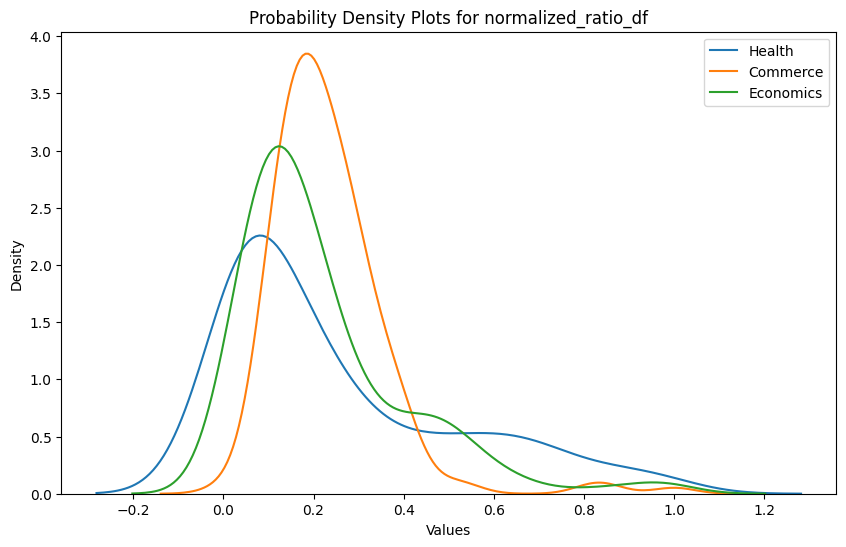

In [60]:
# probability density plot of new data
plt.figure(figsize=(10,6))
for column in normalized_ratio_df.columns:
    sns.kdeplot(normalized_ratio_df[column], label = column)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Probability Density Plots for normalized_ratio_df')
plt.legend()
plt.show()

That is better and can be managed when it comes to actually training the machines on this new data.

# Modeling #
The first model that's going to be made is going to be made using K-means clustering.  The goal of using K-means is so that it can be visualized where to look for area of greatest need.

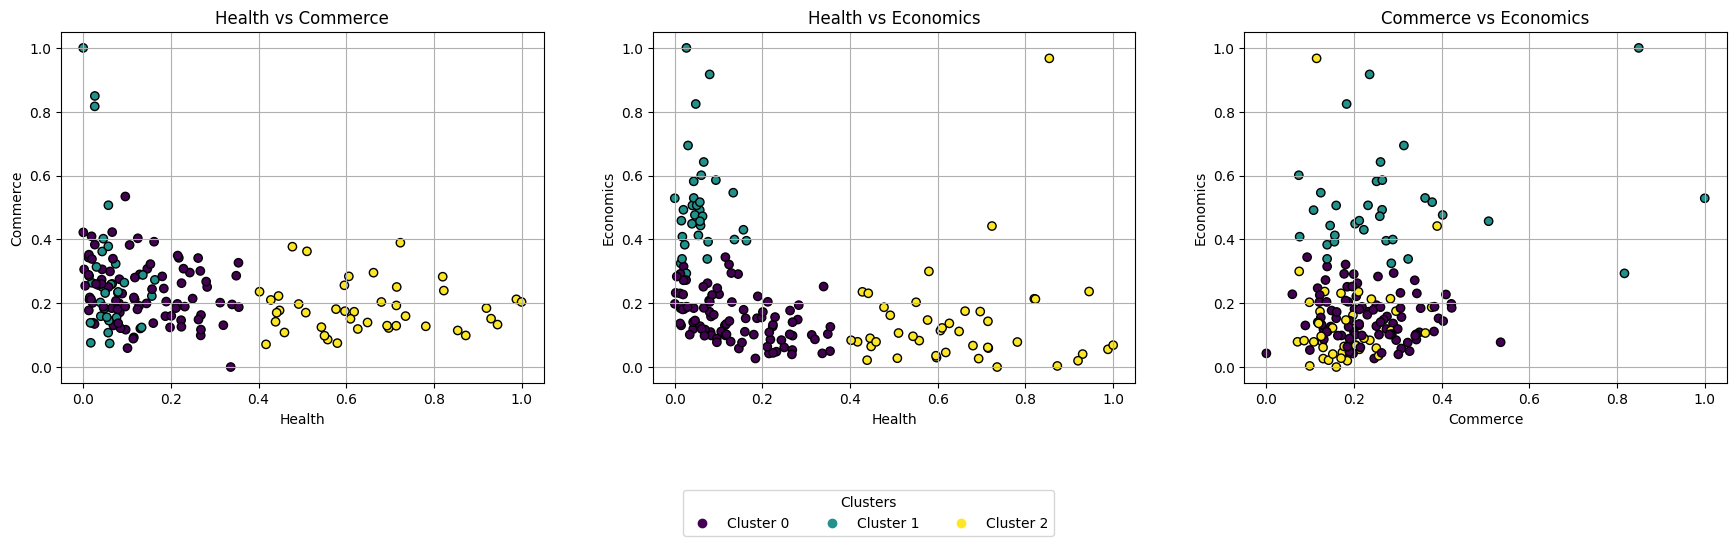

In [61]:
from sklearn.cluster import KMeans
#kmeans sort
kmeans = KMeans(n_clusters = 3, random_state = 42)

# put kmeans with the data
kmeans.fit(normalized_ratio_df)
cluster_labels = kmeans.labels_
normalized_ratio_df['Cluster'] = cluster_labels

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# column combos
column_combinations = [('Health', 'Commerce'), ('Health', 'Economics'), ('Commerce', 'Economics')]

scatter = None  # Placeholder for the scatter plot object

for i, (x_col, y_col) in enumerate(column_combinations):
    ax = axs[i]
    scatter = ax.scatter(normalized_ratio_df[x_col], normalized_ratio_df[y_col], c=cluster_labels, cmap='viridis', marker='o', edgecolor='black')
    ax.set_title(f'{x_col} vs {y_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

# Remove color bar legend from subplots
plt.colorbar(scatter, ax=axs).remove()

# Create a legend for clusters at the bottom
if scatter:
    legend_labels = [f'Cluster {i}' for i in range(len(set(cluster_labels)))]  # Generate labels for each cluster
    fig.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(set(cluster_labels)))

plt.tight_layout(pad=3.0)
plt.show()

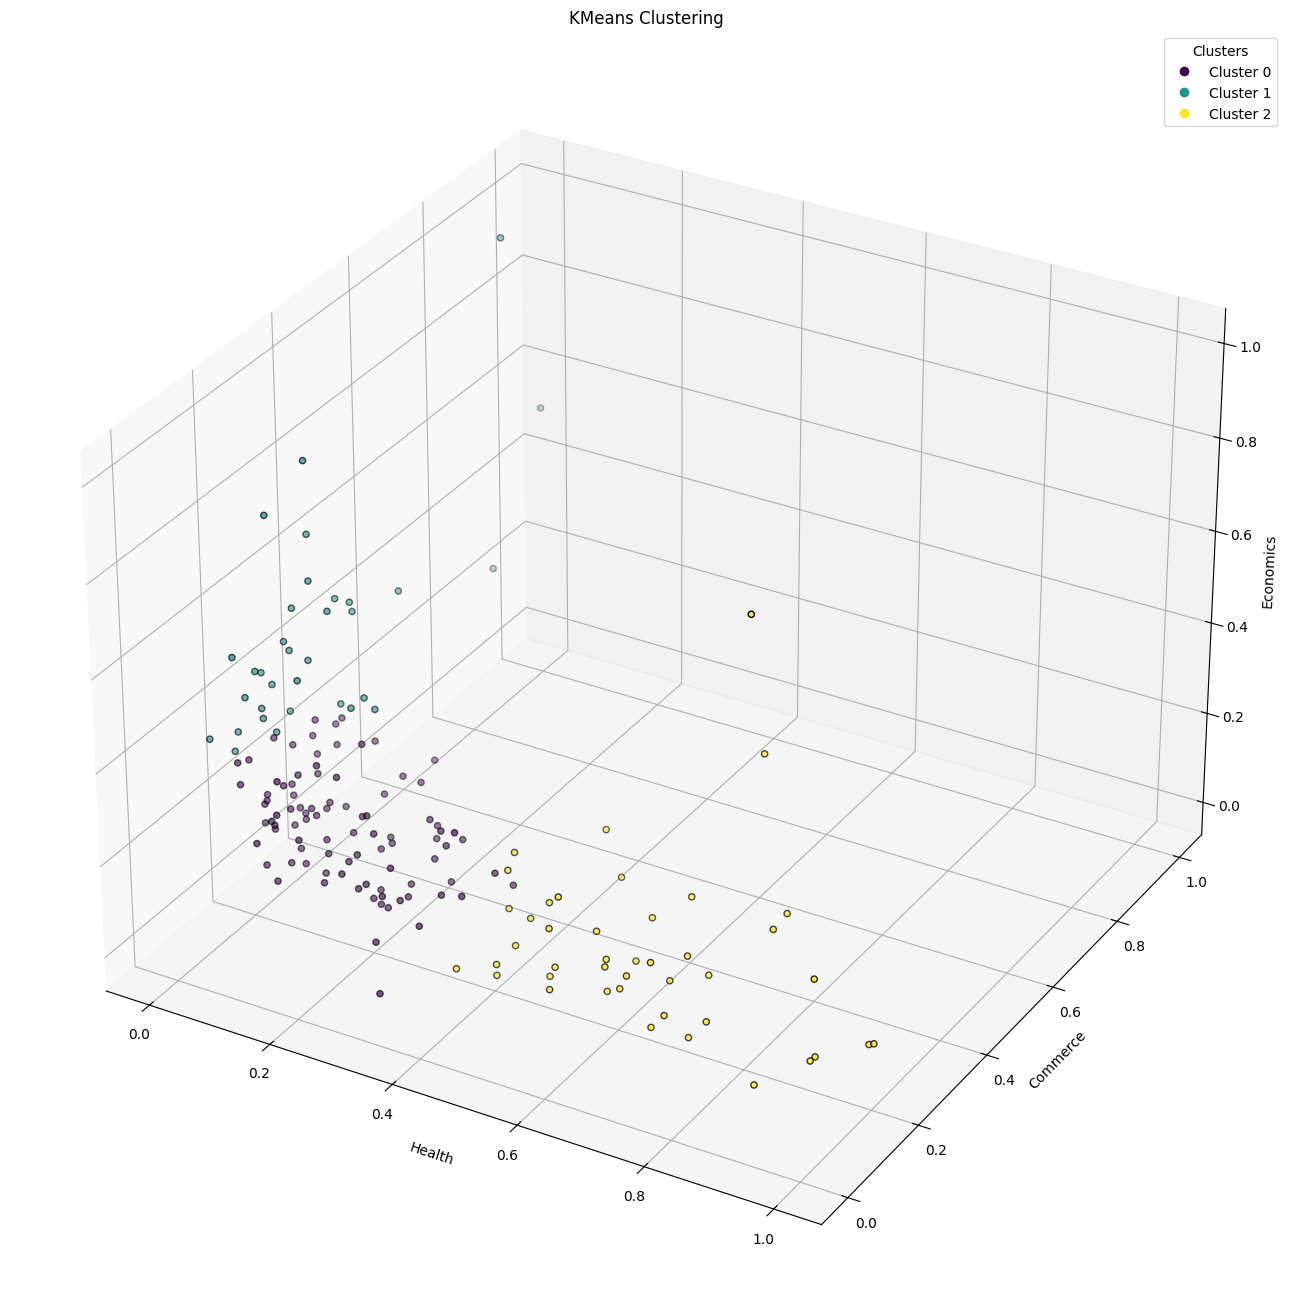

In [62]:
from mpl_toolkits.mplot3d import Axes3D

# Select columns to be used for clustering
selected_columns = ['Health', 'Commerce', 'Economics']  # Replace with your column names

# Initialize KMeans with the number of clusters (n_clusters)
kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters to 3 as an example

# Fit KMeans to the selected columns
kmeans.fit(normalized_ratio_df[selected_columns])

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
normalized_ratio_df['Cluster'] = cluster_labels



# Visualize the clusters (for 3D data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D clusters
scatter = ax.scatter(normalized_ratio_df['Health'], normalized_ratio_df['Commerce'], normalized_ratio_df['Economics'], c=cluster_labels, cmap='viridis', marker='o', edgecolor='black')

ax.set_title('KMeans Clustering')
ax.set_xlabel('Health')
ax.set_ylabel('Commerce')
ax.set_zlabel('Economics')

# Create a legend
legend_labels = [f'Cluster {i}' for i in range(len(set(cluster_labels)))]  # Generate labels for each cluster
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

# Adjust subplot parameters to fit the z-axis label
plt.subplots_adjust(left=0.01, right=2, bottom=0.1, top=3)  # You can adjust these values as needed

# Show the plot
plt.show()

In [63]:
# add country labels back in
# add the countires column back into the dataset
normalized_ratio_df['country'] = country_data['country']
normalized_ratio_df.head()

,Health,Commerce,Economics,Cluster,country
0,0.648622,0.139614,0.111611,2,Afghanistan
1,0.081626,0.199901,0.109557,0,Albania
2,0.212204,0.186622,0.204421,0,Algeria
3,0.820077,0.283058,0.214008,2,Angola
4,0.082609,0.275189,0.158396,0,Antigua and Barbuda


In [64]:
# group by cluster
cluster_0_df = normalized_ratio_df[normalized_ratio_df['Cluster'] == 0]
cluster_1_df = normalized_ratio_df[normalized_ratio_df['Cluster'] == 1]
cluster_2_df = normalized_ratio_df[normalized_ratio_df['Cluster'] == 2]

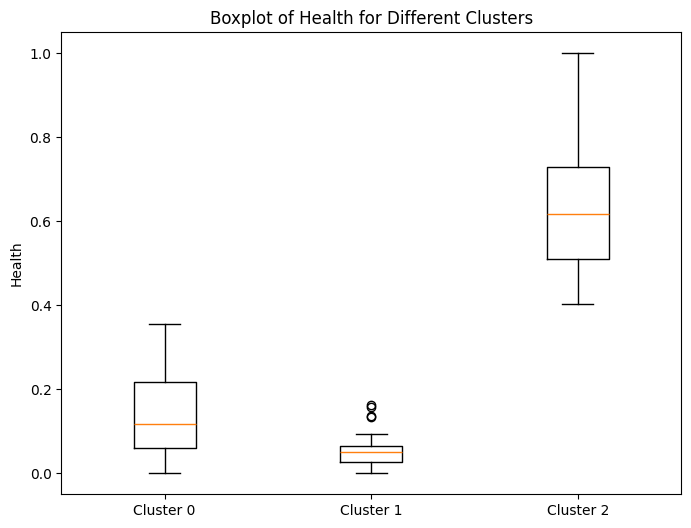

In [65]:
# Extract 'Health' column data for each cluster
health_data_cluster_0 = cluster_0_df['Health']
health_data_cluster_1 = cluster_1_df['Health']
health_data_cluster_2 = cluster_2_df['Health']

# Combine 'Health' column data for all clusters into a list
all_health_data = [health_data_cluster_0, health_data_cluster_1, health_data_cluster_2]

# Create a box and whisker plot for all clusters' 'Health' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_health_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Boxplot of Health for Different Clusters')
plt.ylabel('Health')

# Show the plot
plt.show()

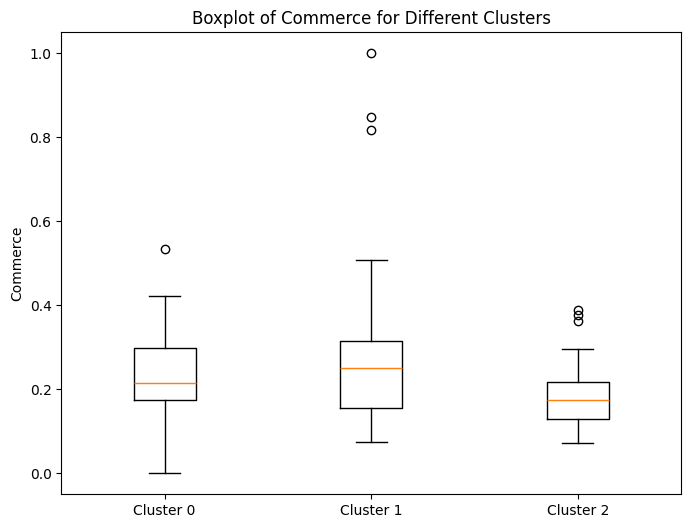

In [66]:
# Extract 'Commerce' column data for each cluster
commerce_data_cluster_0 = cluster_0_df['Commerce']
commerce_data_cluster_1 = cluster_1_df['Commerce']
commerce_data_cluster_2 = cluster_2_df['Commerce']

# Combine 'Commerce' column data for all clusters into a list
all_commerce_data = [commerce_data_cluster_0, commerce_data_cluster_1, commerce_data_cluster_2]

# Create a box and whisker plot for all clusters' 'Commerce' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_commerce_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Boxplot of Commerce for Different Clusters')
plt.ylabel('Commerce')

# Show the plot
plt.show()

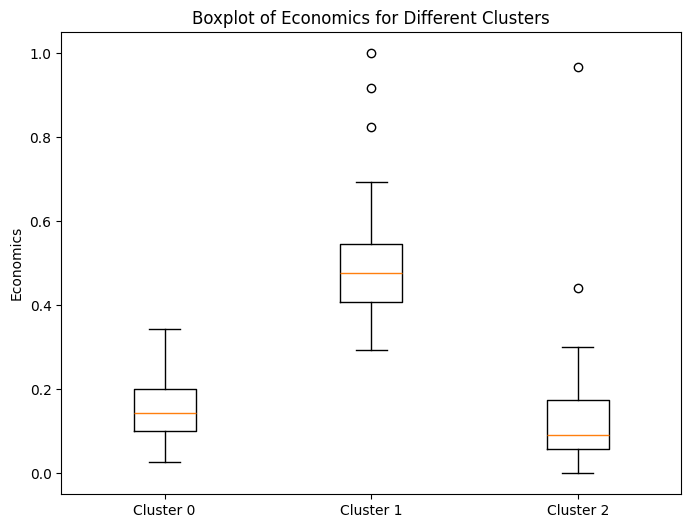

In [67]:
# Extract 'Economics' column data for each cluster
economics_data_cluster_0 = cluster_0_df['Economics']
economics_data_cluster_1 = cluster_1_df['Economics']
economics_data_cluster_2 = cluster_2_df['Economics']

# Combine 'Economics' column data for all clusters into a list
all_economics_data = [economics_data_cluster_0, economics_data_cluster_1, economics_data_cluster_2]

# Create a box and whisker plot for all clusters' 'Economics' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_economics_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Boxplot of Economics for Different Clusters')
plt.ylabel('Economics')

# Show the plot
plt.show()

At first glance, the results for how each type of country is classified into different clusters is a little confusing.  How can cluster 2 countries have a high health score but poor economic and commerce scores?  That is because based on how health was scored (infant mortality, life expectancy, total fertility), a higher score indicates greater need in that area.  For commerce and economics, it is more intuitive.  Lower scores indicate greater need for those countries.  

In [71]:
print(cluster_2_df.shape)

(43, 5)


There are 43 countries that are part of cluster 2, which is the cluster of greatest need.  

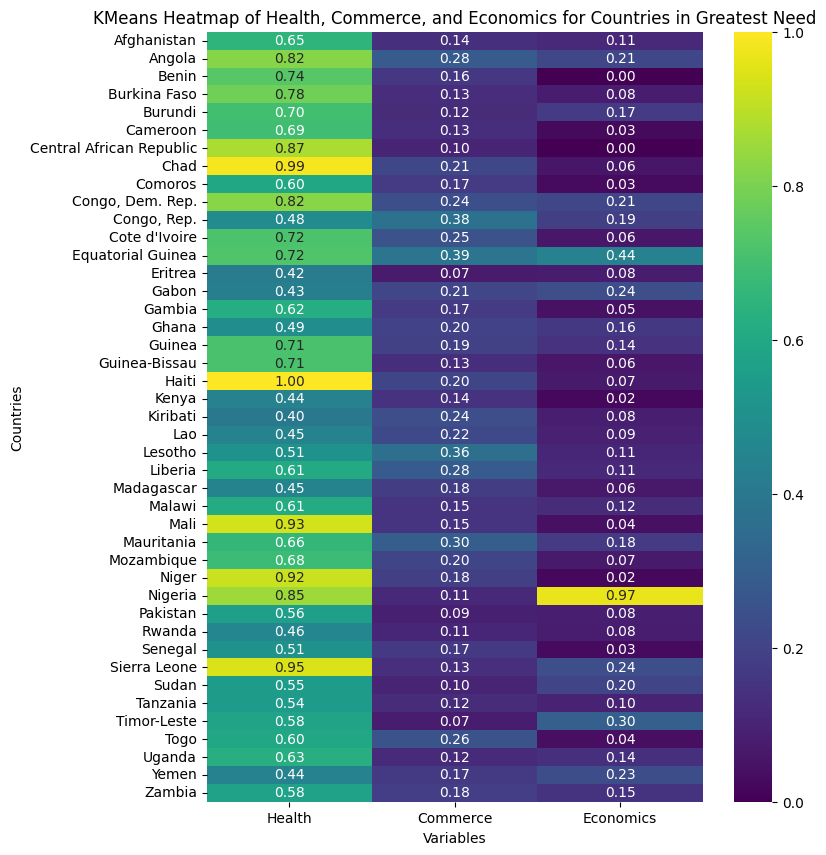

In [72]:
# Set 'Country' column as the index
cluster_2_df.set_index('country', inplace=True)

# Extract relevant columns for the heatmap
heatmap_data = cluster_2_df[['Health', 'Commerce', 'Economics']]

# Set the size of the heatmap
plt.figure(figsize=(8, 10))  # Adjust the figure size according to the number of countries to display

# Create the heatmap
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")

# Set the title and labels
plt.title('KMeans Heatmap of Health, Commerce, and Economics for Countries in Greatest Need')
plt.xlabel('Variables')
plt.ylabel('Countries')

# Show the plot
plt.savefig('Kmeans_heatmap.png', bbox_inches='tight')
plt.show()

## DBSCAN ##


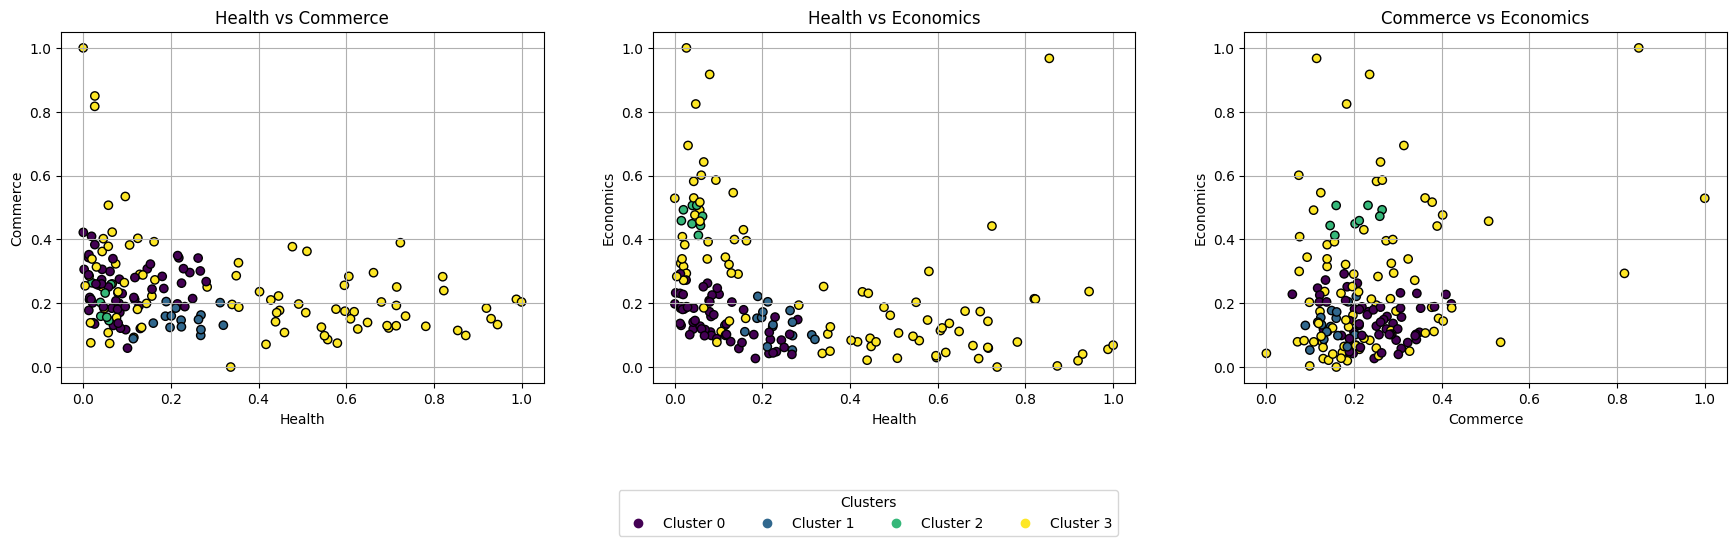

In [74]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering with fixed parameters
eps_value = 0.08  # Adjust the epsilon value according to your data
min_samples_value = 8  # Adjust the min_samples value according to your data

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
cluster_labels = dbscan.fit_predict(normalized_ratio_df[['Health', 'Commerce', 'Economics']])

# Re-label noise points (-1) as 'Cluster 2'
cluster_labels[cluster_labels == -1] = 3  # Re-label -1 as Cluster 2

# Add modified cluster labels to the DataFrame
normalized_ratio_df['Cluster'] = cluster_labels

# Add cluster labels to the DataFrame
normalized_ratio_df['Cluster'] = cluster_labels

# Visualize the clusters for 2D plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
column_combinations = [('Health', 'Commerce'), ('Health', 'Economics'), ('Commerce', 'Economics')]
scatter = None  # Placeholder for the scatter plot object

for i, (x_col, y_col) in enumerate(column_combinations):
    ax = axs[i]
    scatter = ax.scatter(normalized_ratio_df[x_col], normalized_ratio_df[y_col], c=cluster_labels, cmap='viridis', marker='o', edgecolor='black')
    ax.set_title(f'{x_col} vs {y_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

plt.colorbar(scatter, ax=axs).remove()

if scatter:
    legend_labels = [f'Cluster {i}' for i in range(len(set(cluster_labels)))]
    fig.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(set(cluster_labels)))

plt.tight_layout(pad=3.0)
plt.show()

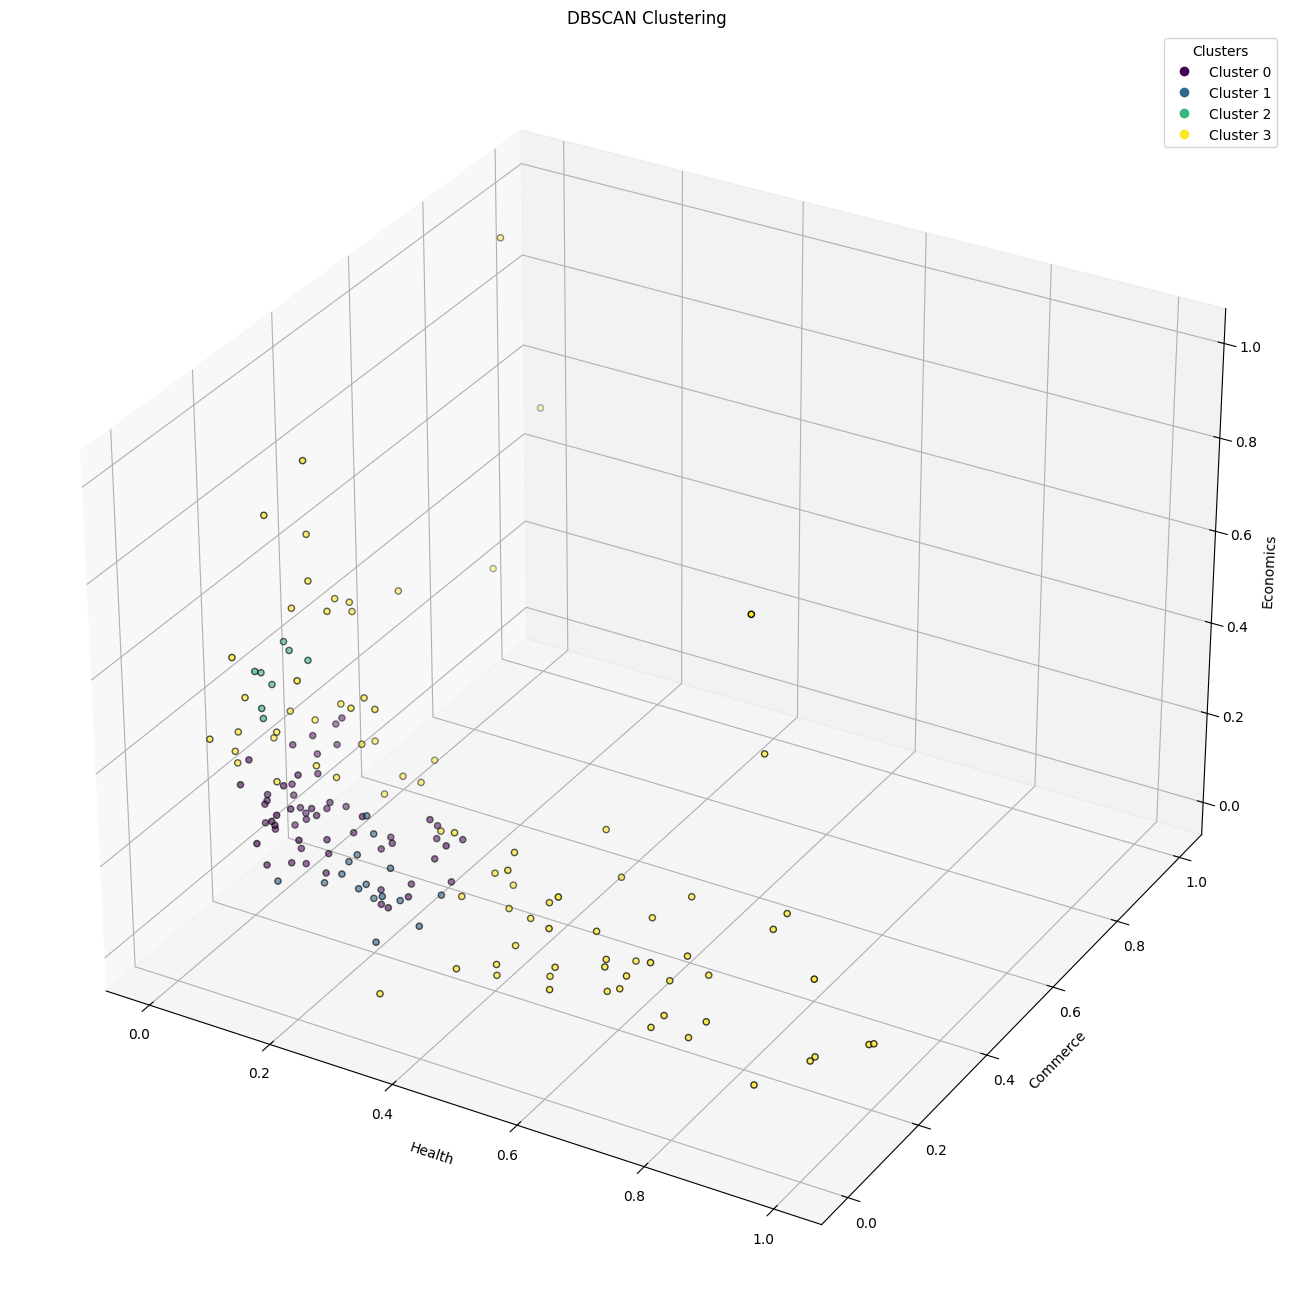

In [75]:
# Add cluster labels to the DataFrame
normalized_ratio_df['Cluster'] = cluster_labels

# Visualize the clusters (for 3D data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D clusters with DBSCAN results
scatter = ax.scatter(normalized_ratio_df['Health'], normalized_ratio_df['Commerce'], normalized_ratio_df['Economics'], c=cluster_labels, cmap='viridis', marker='o', edgecolor='black')

ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Health')
ax.set_ylabel('Commerce')
ax.set_zlabel('Economics')

# Create a legend
legend_labels = [f'Cluster {i}' for i in range(len(set(cluster_labels)))]  # Generate labels for each cluster
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

# Adjust subplot parameters to fit the z-axis label
plt.subplots_adjust(left=0.01, right=2, bottom=0.1, top=3)  # You can adjust these values as needed

# Show the plot
plt.show()

In [76]:
# group by cluster
cluster_0_dbscan = normalized_ratio_df[normalized_ratio_df['Cluster'] == 0]
cluster_1_dbscan = normalized_ratio_df[normalized_ratio_df['Cluster'] == 1]
cluster_2_dbscan = normalized_ratio_df[normalized_ratio_df['Cluster'] == 2]
cluster_3_dbscan = normalized_ratio_df[normalized_ratio_df['Cluster'] == 3]

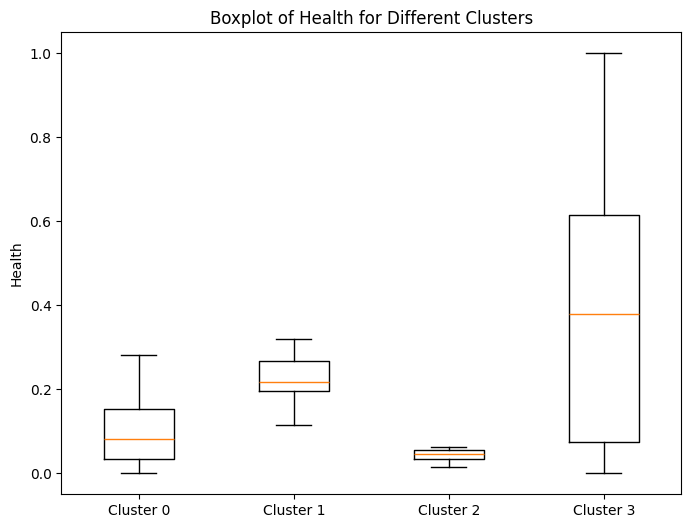

In [77]:
# Extract 'Health' column data for each cluster
health_data_cluster_0_db = cluster_0_dbscan['Health']
health_data_cluster_1_db = cluster_1_dbscan['Health']
health_data_cluster_2_db = cluster_2_dbscan['Health']
health_data_cluster_3_db = cluster_3_dbscan['Health']

# Combine 'Health' column data for all clusters into a list
all_health_data = [health_data_cluster_0_db, health_data_cluster_1_db, health_data_cluster_2_db, health_data_cluster_3_db]

# Create a box and whisker plot for all clusters' 'Health' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_health_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Boxplot of Health for Different Clusters')
plt.ylabel('Health')

# Show the plot
plt.show()

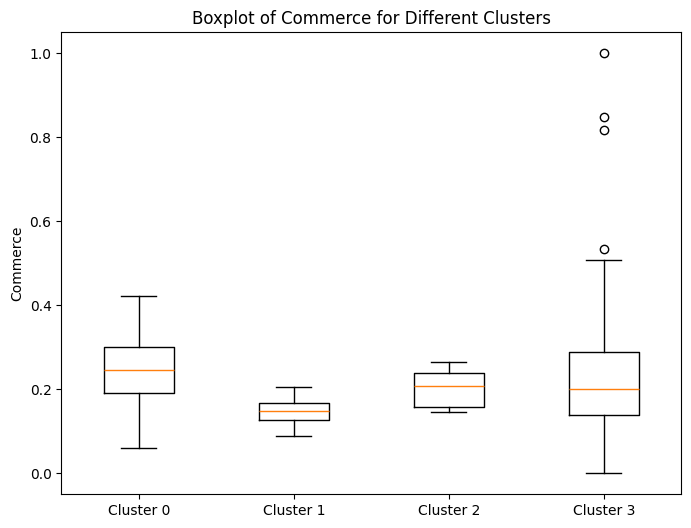

In [78]:
# Extract 'Commerce' column data for each cluster
commerce_data_cluster_0_db = cluster_0_dbscan['Commerce']
commerce_data_cluster_1_db = cluster_1_dbscan['Commerce']
commerce_data_cluster_2_db = cluster_2_dbscan['Commerce']
commerce_data_cluster_3_db = cluster_3_dbscan['Commerce']

# Combine 'Commerce' column data for all clusters into a list
all_commerce_data = [commerce_data_cluster_0_db, commerce_data_cluster_1_db, commerce_data_cluster_2_db, commerce_data_cluster_3_db]

# Create a box and whisker plot for all clusters' 'Commerce' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_commerce_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Boxplot of Commerce for Different Clusters')
plt.ylabel('Commerce')

# Show the plot
plt.show()

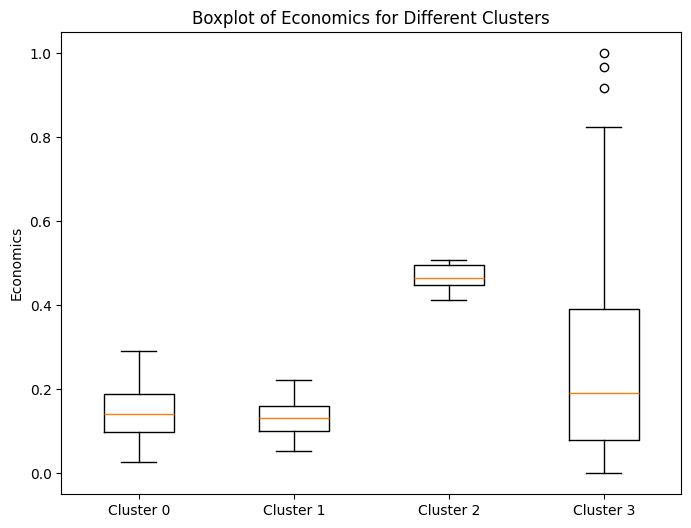

In [79]:
# Extract 'Economics' column data for each cluster
economics_data_cluster_0_db = cluster_0_dbscan['Economics']
economics_data_cluster_1_db = cluster_1_dbscan['Economics']
economics_data_cluster_2_db = cluster_2_dbscan['Economics']
economics_data_cluster_3_db = cluster_3_dbscan['Economics']

# Combine 'Economics' column data for all clusters into a list
all_economics_data = [economics_data_cluster_0_db, economics_data_cluster_1_db, economics_data_cluster_2_db, economics_data_cluster_3_db]

# Create a box and whisker plot for all clusters' 'Economics' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_economics_data, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Boxplot of Economics for Different Clusters')
plt.ylabel('Economics')

# Show the plot
plt.show()

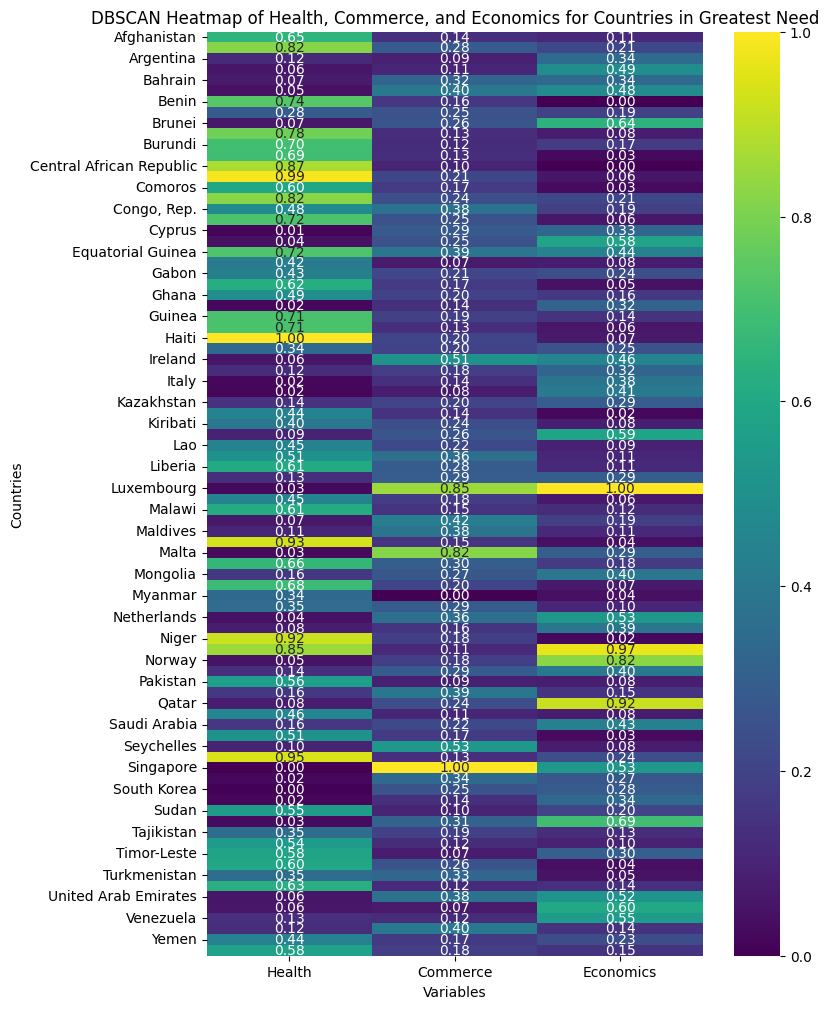

In [80]:
# Set 'Country' column as the index
cluster_3_dbscan.set_index('country', inplace=True)

# Extract relevant columns for the heatmap
heatmap_data = cluster_3_dbscan[['Health', 'Commerce', 'Economics']]

# Set the size of the heatmap
plt.figure(figsize=(8, 12))  # Adjust the figure size according to the number of countries to display

# Create the heatmap
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")

# Set the title and labels
plt.title('DBSCAN Heatmap of Health, Commerce, and Economics for Countries in Greatest Need')
plt.xlabel('Variables')
plt.ylabel('Countries')

# Show the plot
plt.savefig('DBSCAN_heatmap.png', bbox_inches='tight')
plt.show()

In the above heatmap, DBSCAN listed these countries as outliers which presents problems with how DBSCAN can be used.  The 'commerce' variable was very heavily infulentical in how each cluster was labeled, clearly.  You can notice based on these results there are some countries that really don't appear to need much help but got grouped in with countries that clearly do.  

## Hierarchial ##

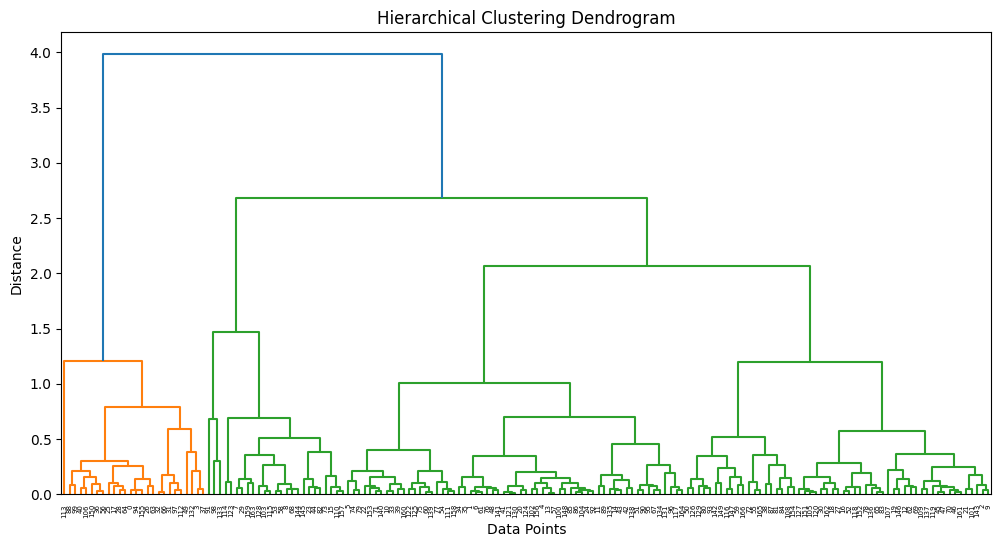

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Assuming normalized_ratio_df contains your data

# Select columns for clustering
selected_columns = ['Health', 'Commerce', 'Economics']

# Perform hierarchical clustering
# Use the linkage function to perform hierarchical/agglomerative clustering using the selected columns
linkage_matrix = linkage(normalized_ratio_df[selected_columns], method='ward', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=normalized_ratio_df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

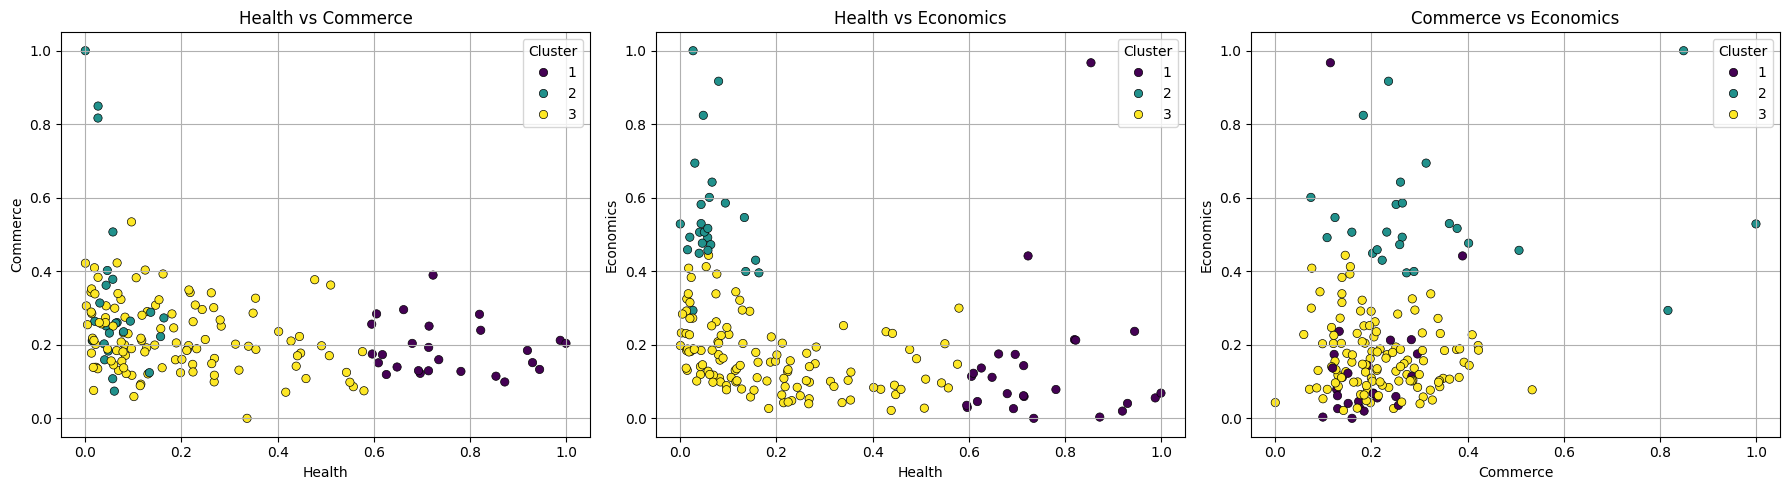

In [82]:
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

# Assign clusters using a distance threshold or number of clusters
# Here, 't' represents the threshold for cutting the dendrogram
t = 100  # Adjust this threshold according to your dendrogram
# Assign clusters based on a chosen number of clusters (k)
k = 3  # Choose the desired number of clusters
clusters = fcluster(linkage_matrix, k, criterion='maxclust')

# Add the cluster labels to the DataFrame
normalized_ratio_df['Cluster'] = clusters

# Define column combinations for scatter plots
column_combinations = [('Health', 'Commerce'), ('Health', 'Economics'), ('Commerce', 'Economics')]

# Create 2D scatter plots for each combination of columns with cluster coloring
plt.figure(figsize=(18, 5))

for i, (x_col, y_col) in enumerate(column_combinations):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=x_col, y=y_col, hue='Cluster', data=normalized_ratio_df, palette='viridis', marker='o', edgecolor='black')
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)

plt.tight_layout()
plt.show()

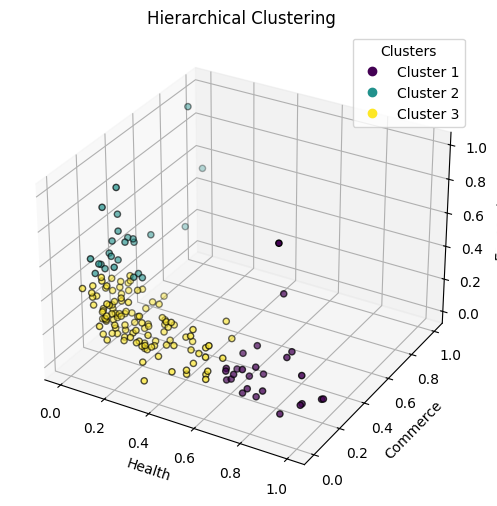

In [83]:
# Create a 3D scatter plot for 'Health', 'Commerce', and 'Economics' columns with cluster coloring
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_col, y_col, z_col = 'Health', 'Commerce', 'Economics'

# Scatter plot for 3D clusters with hierarchical clustering results
scatter = ax.scatter(normalized_ratio_df[x_col], normalized_ratio_df[y_col], normalized_ratio_df[z_col],
                     c=clusters, cmap='viridis', marker='o', edgecolor='black')

ax.set_title('Hierarchical Clustering')
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)

# Create a legend
legend_labels = [f'Cluster {i}' for i in range(1, k+1)]  # Generate labels for each cluster
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()

In [84]:
# group by cluster
cluster_1_hier = normalized_ratio_df[normalized_ratio_df['Cluster'] == 1]
cluster_2_hier = normalized_ratio_df[normalized_ratio_df['Cluster'] == 2]
cluster_3_hier = normalized_ratio_df[normalized_ratio_df['Cluster'] == 3]

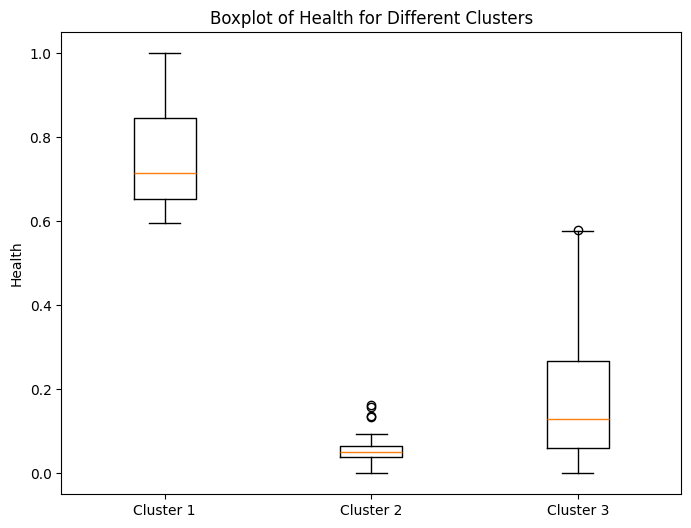

In [85]:
# Extract 'Health' column data for each cluster
hier_health_data_cluster_1 = cluster_1_hier['Health']
hier_health_data_cluster_2 = cluster_2_hier['Health']
hier_health_data_cluster_3 = cluster_3_hier['Health']

# Combine 'Health' column data for all clusters into a list
all_health_data = [hier_health_data_cluster_1, hier_health_data_cluster_2, hier_health_data_cluster_3]

# Create a box and whisker plot for all clusters' 'Health' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_health_data, labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Boxplot of Health for Different Clusters')
plt.ylabel('Health')

# Show the plot
plt.show()

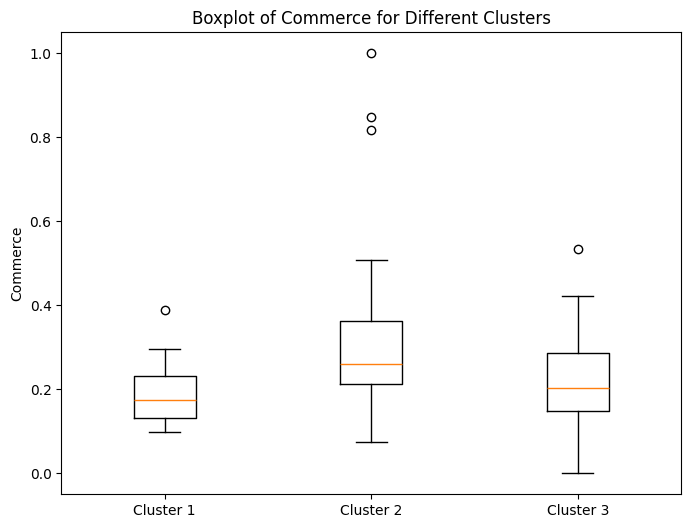

In [86]:
# Extract 'Commerce' column data for each cluster
hier_commerce_data_cluster_1 = cluster_1_hier['Commerce']
hier_commerce_data_cluster_2 = cluster_2_hier['Commerce']
hier_commerce_data_cluster_3 = cluster_3_hier['Commerce']

# Combine 'Commerce' column data for all clusters into a list
all_commerce_data = [hier_commerce_data_cluster_1, hier_commerce_data_cluster_2, hier_commerce_data_cluster_3]

# Create a box and whisker plot for all clusters' 'Commerce' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_commerce_data, labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Boxplot of Commerce for Different Clusters')
plt.ylabel('Commerce')

# Show the plot
plt.show()

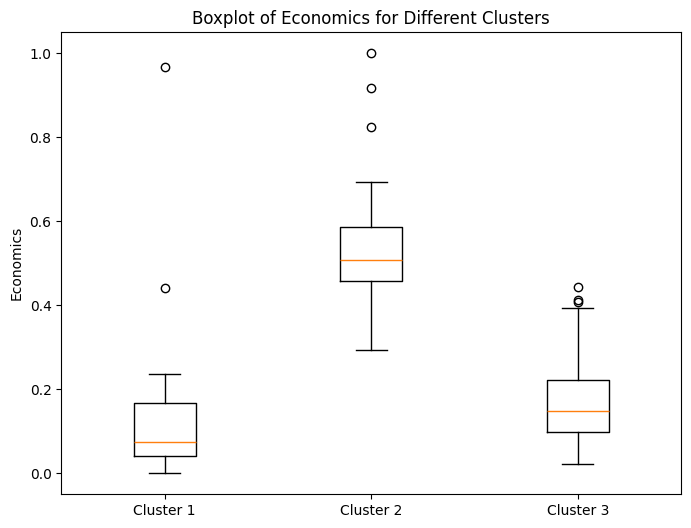

In [87]:
# Extract 'Economics' column data for each cluster
hier_economics_data_cluster_1 = cluster_1_hier['Economics']
hier_economics_data_cluster_2 = cluster_2_hier['Economics']
hier_economics_data_cluster_3 = cluster_3_hier['Economics']

# Combine 'Economics' column data for all clusters into a list
all_economics_data = [hier_economics_data_cluster_1, hier_economics_data_cluster_2, hier_economics_data_cluster_3]

# Create a box and whisker plot for all clusters' 'Economics' column on a single graph
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

plt.boxplot(all_economics_data, labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Boxplot of Economics for Different Clusters')
plt.ylabel('Economics')

# Show the plot
plt.show()

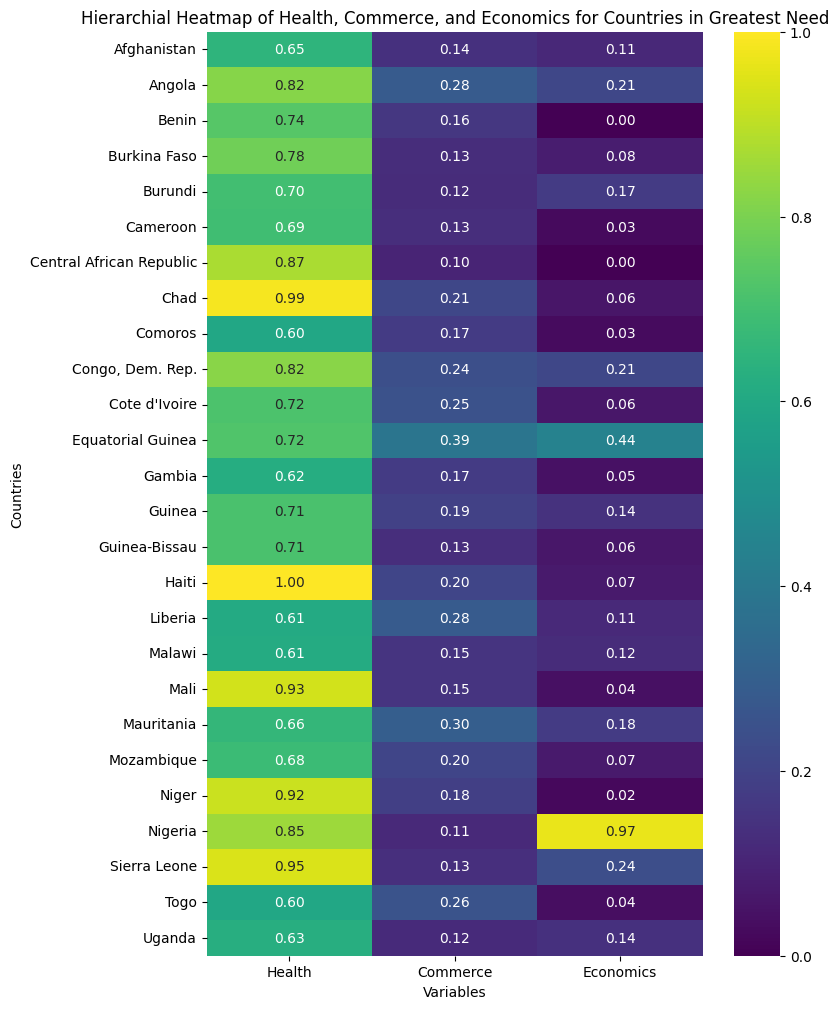

In [88]:
# Set 'Country' column as the index
cluster_1_hier.set_index('country', inplace=True)

# Extract relevant columns for the heatmap
heatmap_data = cluster_1_hier[['Health', 'Commerce', 'Economics']]

# Set the size of the heatmap
plt.figure(figsize=(8, 12))  # Adjust the figure size according to the number of countries to display

# Create the heatmap
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")

# Set the title and labels
plt.title('Hierarchial Heatmap of Health, Commerce, and Economics for Countries in Greatest Need')
plt.xlabel('Variables')
plt.ylabel('Countries')

# Show the plot
plt.savefig('hierarchial_heatmap.png', bbox_inches='tight')
plt.show()

This method appears to make more sense (high health scores, low commerce and economics scores) and is an even smaller list of countries than KMeans.  This appears to perform better than DBSCAN.  

## Results and Conclusions ##

Start be re-loading all of the heatmaps:

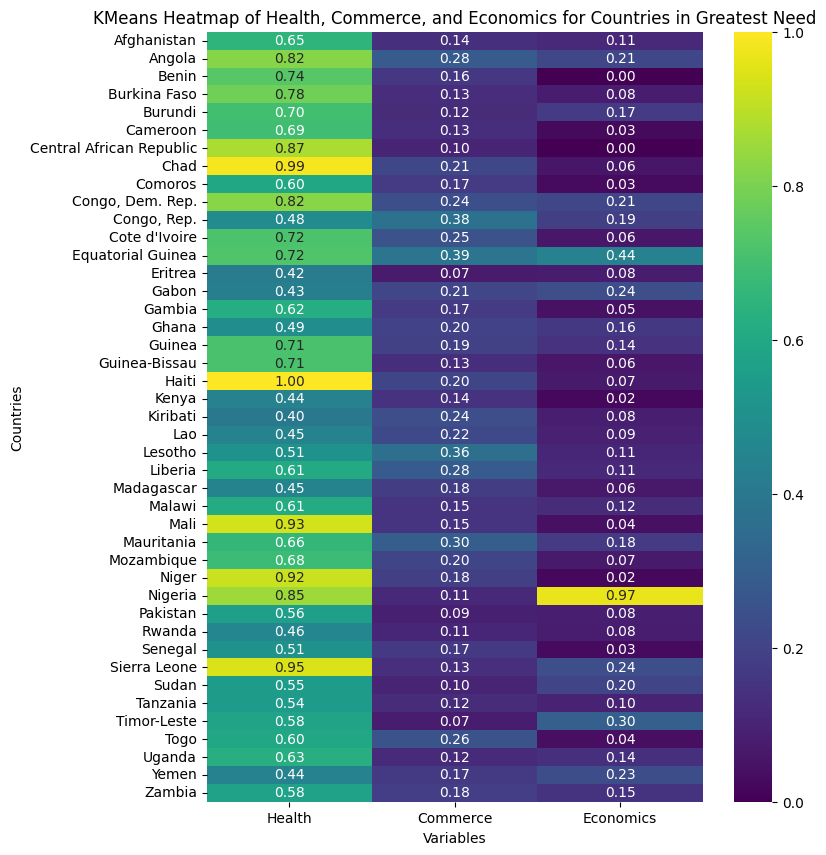

In [89]:
from IPython.display import Image

# Display the saved heatmap image
Image(filename='Kmeans_heatmap.png')


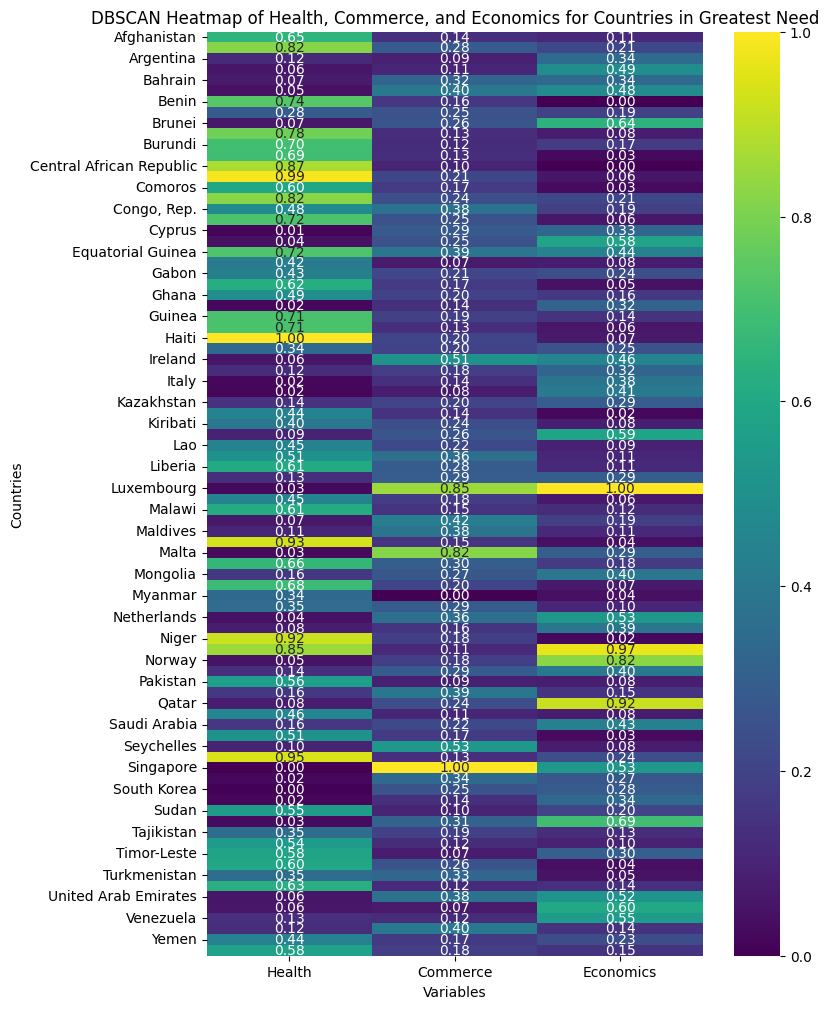

In [90]:
Image(filename='DBSCAN_heatmap.png')


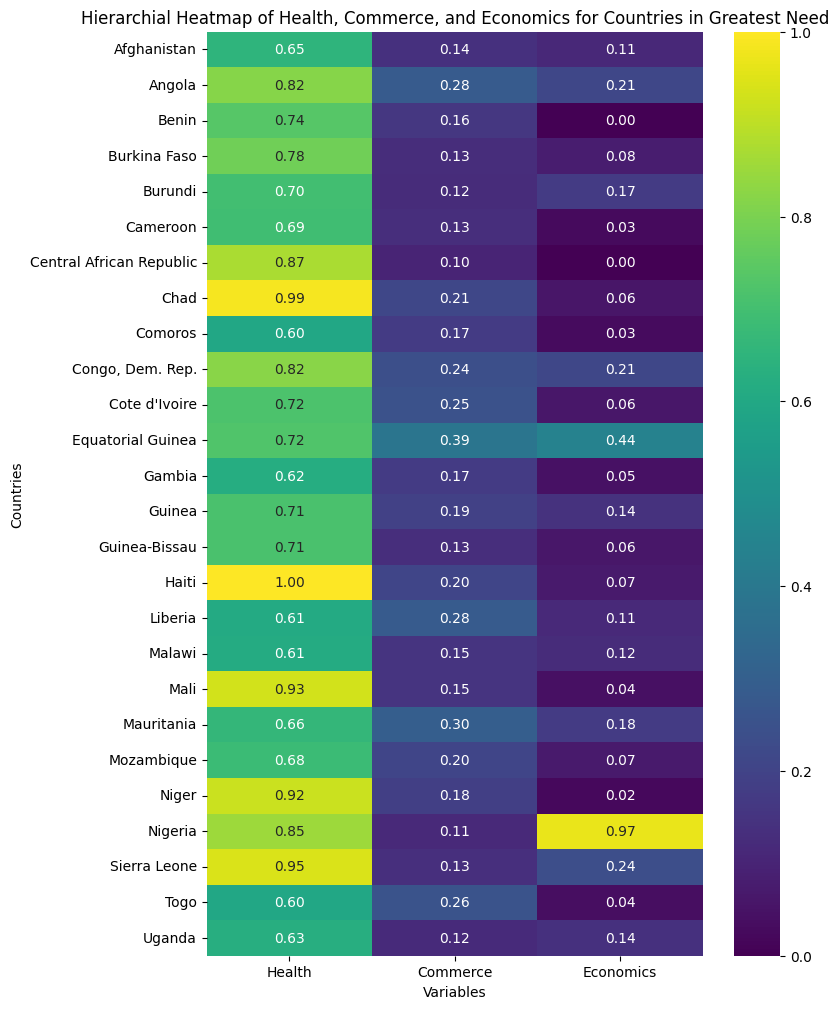

In [91]:
Image(filename='hierarchial_heatmap.png')

Based on these heatmaps, KMeans & Hierarchial clustering appears to have a better pattern that seems to make more sense.  These generally regarded countries with poor health, commerce, and economic scores as the countries with greatest need.  However, hierarchial clustering was more selective and did not have as many labeled countries that were in great need.  So depending on how much money and resources HELP has, the suggestion would be to either use KMeans or Hierarchial results to determine where they want to put their resources.  If there's fewer resources, it's best to be selective and use Hierarchial.  If there's lots of resources, use Kmeans.  

In terms of timing, Hierarchial clustering took a little longer than KMeans simply because of the extra step that was necessary.  But overall, there isn't a lot of time used for finding these results.  The results are also robust because there's different ways to be able to look at how you would want to spend your resources.

For instance, based on these results a country like Nigeria has a poor health and commerce score.  However, Nigeria has a strong economics score.  So if a natural disaster happened in Nigeria, HELP could use this data to recognize that this is a country of great need in terms of needing resources for people's health but not necessarily needing money.  This is an example of being able to use machine learning to prioritize resources.

As to why DBSCAN may not be as useful for HELP, that may be attributed to the fact that DBSCAN focuses on removing noisy data.  As mentioned earlier, DBSCAN listed the countries that should be listed for greatest need as "outliers".  A great example is that the country, Haiti, was listed as an outlier.  Clearly, the goals of DBSCAN are not the same has the other two methods which align more with what HELP is trying to accomplish.  

Overall, it was good to compare and contrast the different methods.  KMeans and Hierarchial clustering are both proven methods that HELP can probably use for finding areas of greatest need.  

## Acknowledgments ##

Kaggle Dataset: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data 

Kaggle Dataset: authored by Rohan Kokkula

Help with KMeans clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Help with DBSCAN clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Help with Hierarchial clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

More help with Hierarchial clustering: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

